In [101]:
import pandas as pd
import numpy as np

In [102]:
calls_dataset = pd.read_csv('dataset/calls.csv')
customer_dataset= pd.read_csv('dataset/customers.csv')
reason_dataset= pd.read_csv('dataset/reason.csv')
sentiment_dataset= pd.read_csv('dataset/sentiment_statistics.csv')

In [103]:
call_reason_dataset= pd.merge(calls_dataset,reason_dataset, on=('call_id') ,how=('left'))
call_reason_dataset

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating
...,...,...,...,...,...,...,...,...
71805,1563273072,8022667294,413148,8/31/2024 23:48,8/31/2024 23:57,9/1/2024 0:25,\n\nAgent: Thank you for calling United Airlin...,Post Flight
71806,8865997781,4474867021,980156,8/31/2024 23:55,8/31/2024 23:58,9/1/2024 0:06,\n\nAgent: Thank you for calling United Airlin...,Upgrade
71807,8019240181,9762042472,616988,8/31/2024 23:52,8/31/2024 23:58,9/1/2024 0:04,\n\nAgent: Thank you for calling United Airlin...,Upgrade
71808,8332067080,8095620266,161354,8/31/2024 23:53,8/31/2024 23:59,9/1/2024 0:03,\n\nAgent: Thank you for calling United Airlin...,NaN


In [104]:
call_sentiment_dataset= pd.merge(sentiment_dataset, call_reason_dataset, on=('call_id'), how=('left'))
call_sentiment_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating


In [105]:
main_dataset= pd.merge(call_sentiment_dataset, customer_dataset, on=('customer_id'), how=('left'))
main_dataset.head()

,call_id,agent_id_x,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_id,agent_id_y,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,customer_name,elite_level_code
0,4667960400,963118,neutral,angry,-0.04,0.39,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,Matthew Foster,4.0
1,1122072124,519057,calm,neutral,0.02,0.35,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Booking,Tammy Walters,NaN
2,6834291559,158319,neutral,polite,-0.13,0.32,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,IRROPS,Jeffery Dixon,NaN
3,2266439882,488324,neutral,frustrated,-0.20,0.20,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,Upgrade,David Wilkins,2.0
4,1211603231,721730,neutral,polite,-0.05,0.35,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Seating,Elizabeth Daniels,0.0


In [106]:
main_dataset.isnull().sum()

call_id                        0
agent_id_x                     0
agent_tone                   217
customer_tone                  0
average_sentiment            109
silence_percent_average        0
customer_id                    0
agent_id_y                     0
call_start_datetime            0
agent_assigned_datetime        0
call_end_datetime              0
call_transcript                0
primary_call_reason         5157
customer_name                  0
elite_level_code           25767
dtype: int64

In [107]:
main_dataset['elite_level_code'].fillna(0, inplace=True)
main_dataset['agent_tone'].fillna('neutral', inplace=True)
main_dataset['average_sentiment'].fillna(main_dataset['average_sentiment'].mean(), inplace=True)
main_dataset.isnull().sum()

call_id                       0
agent_id_x                    0
agent_tone                    0
customer_tone                 0
average_sentiment             0
silence_percent_average       0
customer_id                   0
agent_id_y                    0
call_start_datetime           0
agent_assigned_datetime       0
call_end_datetime             0
call_transcript               0
primary_call_reason        5157
customer_name                 0
elite_level_code              0
dtype: int64

In [108]:
main_dataset['call_start_datetime']= pd.to_datetime(main_dataset['call_start_datetime'])
main_dataset['call_end_datetime']= pd.to_datetime(main_dataset['call_end_datetime'])
main_dataset['agent_assigned_datetime']= pd.to_datetime(main_dataset['agent_assigned_datetime'])

In [109]:
main_dataset['handle_time']= (main_dataset['call_end_datetime']- main_dataset['agent_assigned_datetime']).dt.total_seconds()
main_dataset['allocation_time']= (main_dataset['agent_assigned_datetime']- main_dataset['call_start_datetime']).dt.total_seconds()
main_dataset.drop('call_transcript', axis=1, inplace=True)
main_dataset.drop('agent_id_y', axis=1, inplace=True)

In [110]:
aht = main_dataset['handle_time'].mean()
ast = main_dataset['allocation_time'].mean()
print(f"Average Handle Time (AHT): {aht//60} min")
print(f"Average Speed to Answer (AST): {ast//60} min")

Average Handle Time (AHT): 11.0 min
Average Speed to Answer (AST): 7.0 min


In [111]:
import re
main_dataset['primary_call_reason'].fillna('Unknown Reason', inplace=True)
main_dataset.isnull().sum() # preprocessing completed
main_dataset['primary_call_reason'].value_counts()
def clean_reason(reason):
    reason = re.sub(r'\s+', ' ', reason)  # Replace multiple spaces with a single space
    reason = reason.strip()  # Remove leading and trailing spaces
    return reason.lower() 

main_dataset['primary_call_reason'] = main_dataset['primary_call_reason'].apply(clean_reason)

# Check for unique call reasons after cleaning
unique_reasons = main_dataset['primary_call_reason'].unique()
print(unique_reasons)

# Get value counts of cleaned call reasons
reason_counts = main_dataset['primary_call_reason'].value_counts()
print(reason_counts)

# Check for any remaining null values
print(main_dataset.isnull().sum())

# def remove_spaces(reason):
#     reason = re.sub(r'\s+', ' ', reason)
#     reason = reason.strip()  # Remove leading/trailing spaces
#     return reason.lower() 
    # words= reason.split()
    # final_value= ""

    # for i in words:
    #     i.strip()
    #     if(final_value!= ""):
    #         if(i!= " "):
    #             final_value = final_value + " " + i
    #     else:
    #         final_value= i

# main_dataset['primary_call_reason'].apply(remove_spaces)
(main_dataset['primary_call_reason'].unique())

['voluntary cancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileage plus'
 'checkout' 'unknown reason' 'voluntary change' 'post flight' 'check in'
 'other topics' 'communications' 'schedule change' 'products & services'
 'digital support' 'disability' 'unaccompanied minor' 'baggage'
 'traveler updates' 'etc' 'post-flight' 'check-in' 'products and services']
primary_call_reason
irrops                   13311
voluntary change         10848
seating                   6365
mileage plus              5851
unknown reason            5157
post-flight               3957
communications            3840
products and services     2856
baggage                   2832
upgrade                   2738
booking                   2637
checkout                  1888
voluntary cancel          1607
check-in                  1519
digital support           1225
etc                        952
traveler updates           937
other topics               818
schedule change            731
products & services        476


array(['voluntary cancel', 'booking', 'irrops', 'upgrade', 'seating',
       'mileage plus', 'checkout', 'unknown reason', 'voluntary change',
       'post flight', 'check in', 'other topics', 'communications',
       'schedule change', 'products & services', 'digital support',
       'disability', 'unaccompanied minor', 'baggage', 'traveler updates',
       'etc', 'post-flight', 'check-in', 'products and services'],
      dtype=object)

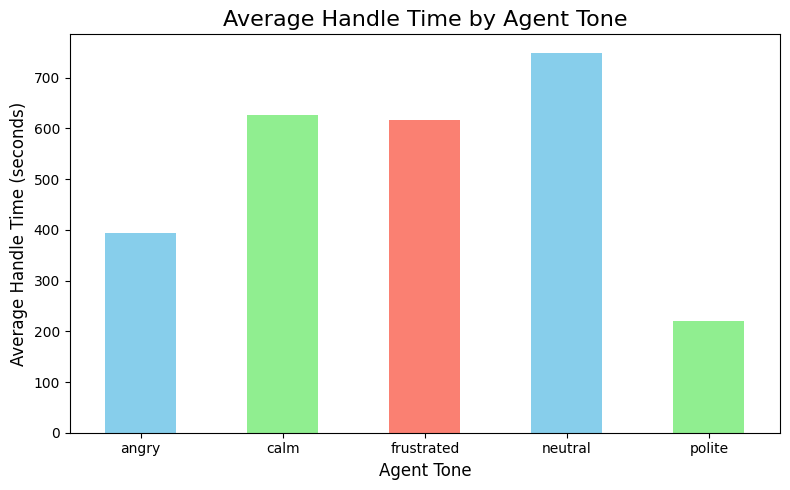

In [112]:
import matplotlib.pyplot as plt
avg_handle_time_by_agent_tone = main_dataset.groupby('agent_tone')['handle_time'].mean()
plt.figure(figsize=(8, 5))
avg_handle_time_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

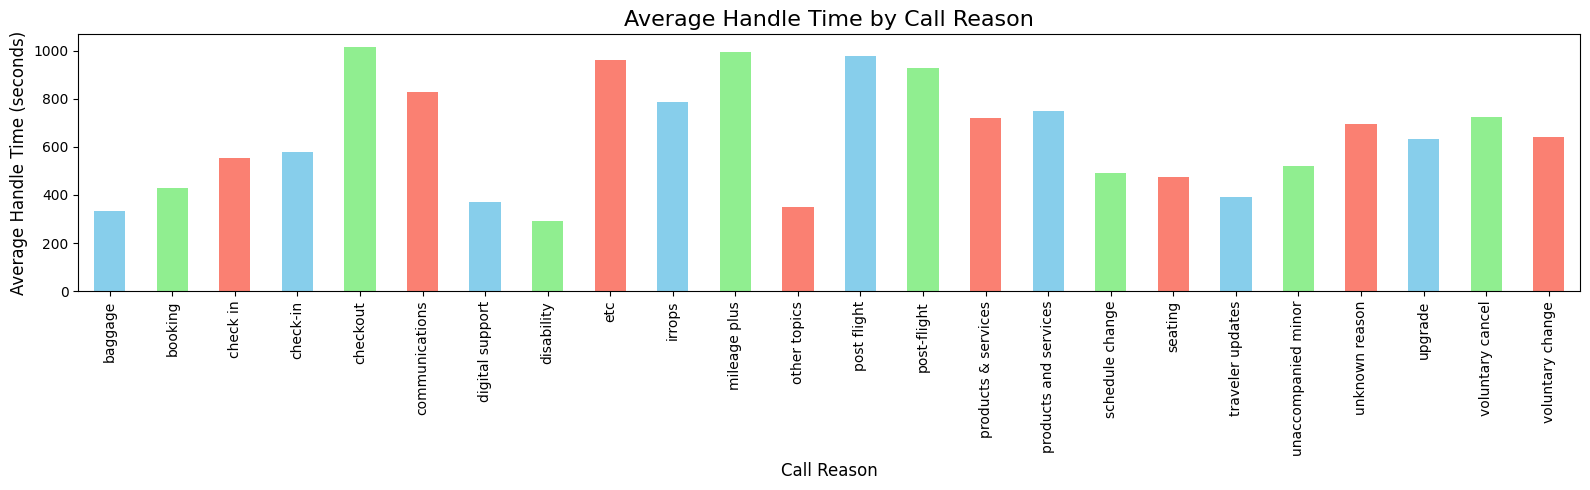

In [113]:
avg_handle_time_by_reason= main_dataset.groupby('primary_call_reason')['handle_time'].mean()
plt.figure(figsize=(16, 5))
avg_handle_time_by_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64


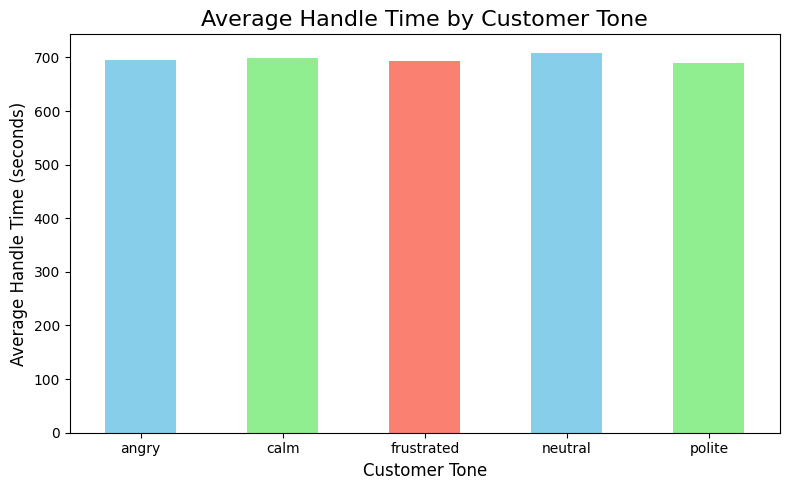

In [114]:
avg_handle_time_by_customer_tone = main_dataset.groupby('customer_tone')['handle_time'].mean()
print(avg_handle_time_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

customer_tone
angry         695.530261
calm          699.604098
frustrated    692.738764
neutral       707.625312
polite        689.659731
Name: handle_time, dtype: float64


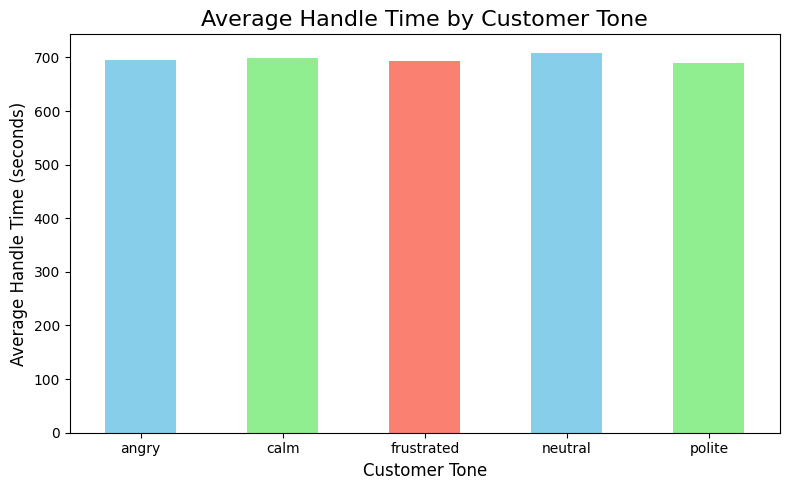

In [115]:
avg_handle_time_by_customer_tone = main_dataset.groupby('customer_tone')['handle_time'].mean()
print(avg_handle_time_by_customer_tone)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Handle Time by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Handle Time (seconds)', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [116]:
print(main_dataset['average_sentiment'].max())
print(main_dataset['average_sentiment'].min())

2.67
-1.38


customer_tone
angry         0.18
calm          0.15
frustrated    0.10
neutral       0.10
polite        0.16
Name: silence_percent_average, dtype: float64


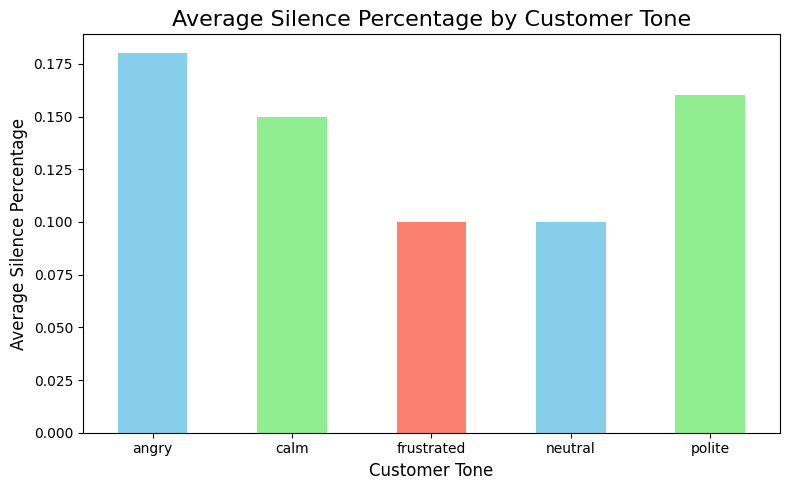

In [117]:
avg_handle_time_by_customer_tone_mode = main_dataset.groupby('customer_tone')['silence_percent_average'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print(avg_handle_time_by_customer_tone_mode)
plt.figure(figsize=(8, 5))
avg_handle_time_by_customer_tone_mode.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

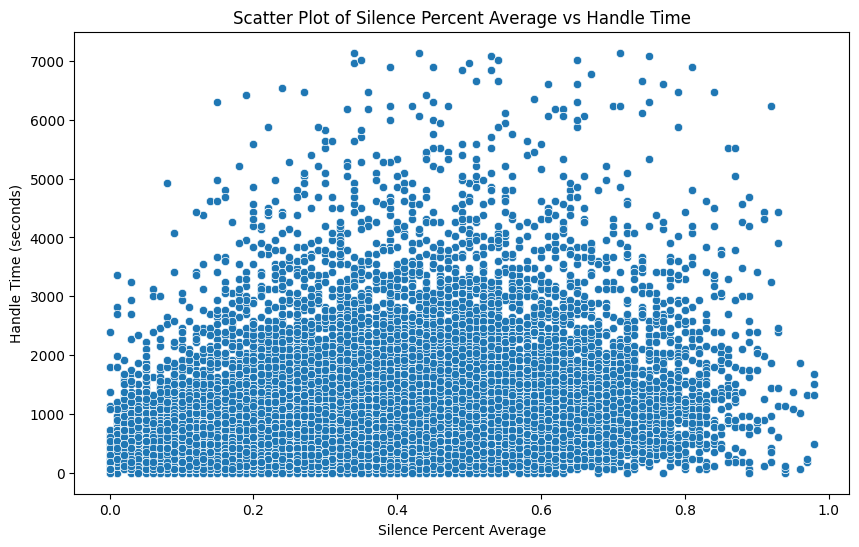

In [118]:
import seaborn as sns

# Assuming you have a DataFrame `main_dataset` with columns 'silence_percent_average' and 'handle_time'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=main_dataset, x='silence_percent_average', y='handle_time')
plt.title('Scatter Plot of Silence Percent Average vs Handle Time')
plt.xlabel('Silence Percent Average')
plt.ylabel('Handle Time (seconds)')
plt.show()

customer_tone
angry         0.18
calm          0.15
frustrated    0.10
neutral       0.10
polite        0.16
Name: silence_percent_average, dtype: float64


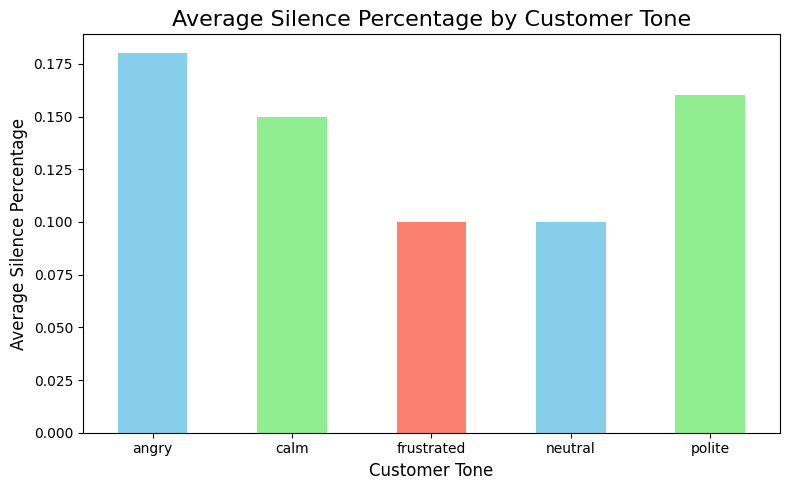

In [119]:
silence_average_by_customer_tone = main_dataset.groupby('customer_tone')['silence_percent_average'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)
print(silence_average_by_customer_tone)
plt.figure(figsize=(8, 5))
silence_average_by_customer_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Customer Tone', fontsize=16)
plt.xlabel('Customer Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

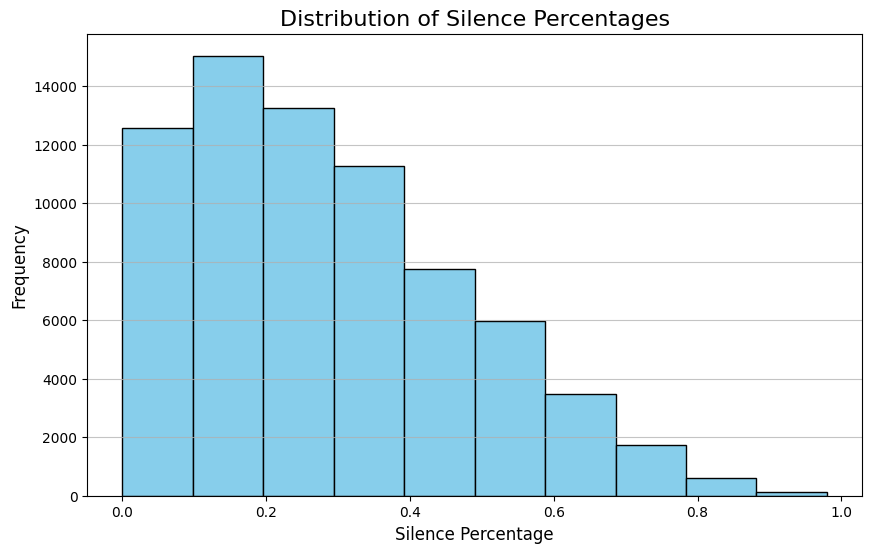

In [120]:
plt.figure(figsize=(10, 6))
plt.hist(main_dataset['silence_percent_average'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Silence Percentages', fontsize=16)
plt.xlabel('Silence Percentage', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.75)
plt.show()

agent_tone
angry         0.190077
calm          0.291409
frustrated    0.251336
neutral       0.285983
polite        0.256552
Name: silence_percent_average, dtype: float64


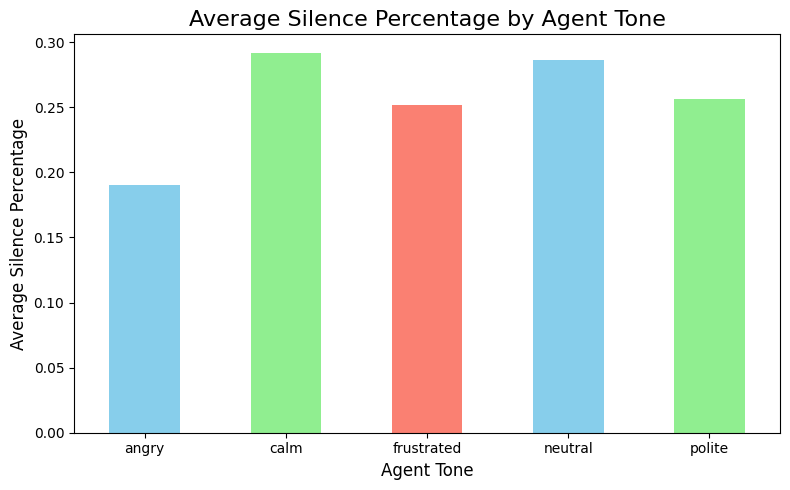

In [121]:
silence_average_by_agent_tone = main_dataset.groupby('agent_tone')['silence_percent_average'].mean()
print(silence_average_by_agent_tone)
plt.figure(figsize=(8, 5))
silence_average_by_agent_tone.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Agent Tone', fontsize=16)
plt.xlabel('Agent Tone', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

primary_call_reason
baggage                  0.250508
booking                  0.260948
check in                 0.264857
check-in                 0.262199
checkout                 0.292309
communications           0.303578
digital support          0.285298
disability               0.248635
etc                      0.287563
irrops                   0.309404
mileage plus             0.275038
other topics             0.272726
post flight              0.296810
post-flight              0.297897
products & services      0.274622
products and services    0.277115
schedule change          0.267223
seating                  0.264613
traveler updates         0.284717
unaccompanied minor      0.242500
unknown reason           0.286411
upgrade                  0.277023
voluntary cancel         0.281767
voluntary change         0.289599
Name: silence_percent_average, dtype: float64


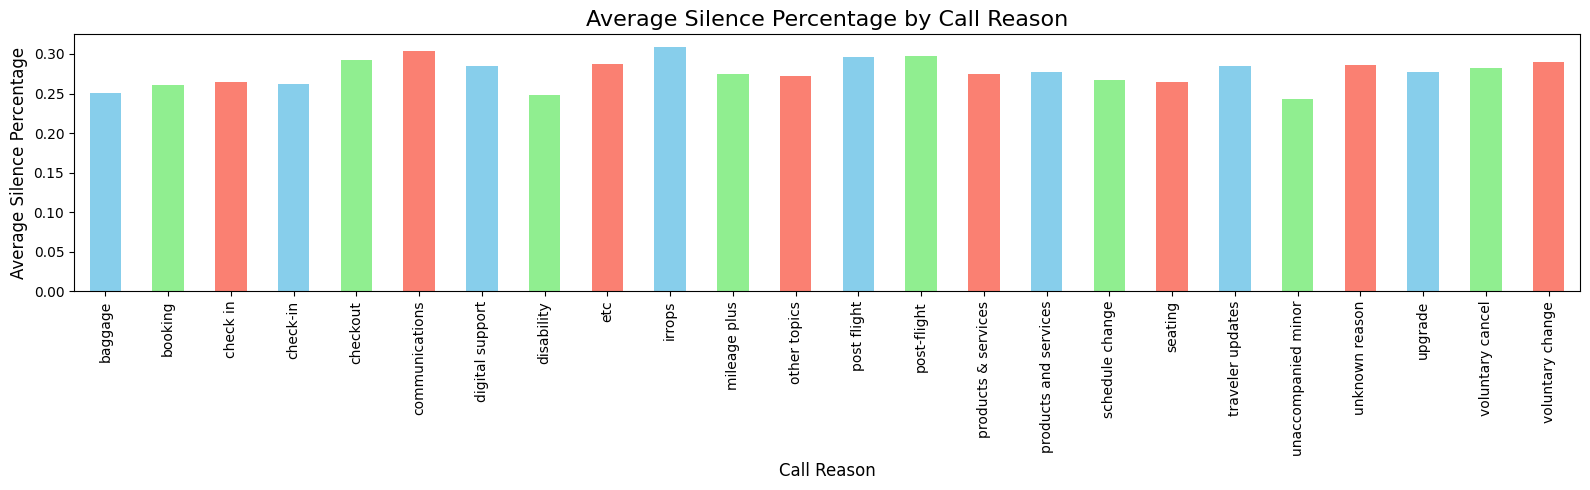

In [122]:
silence_average_by_call_reason = main_dataset.groupby('primary_call_reason')['silence_percent_average'].mean()
print(silence_average_by_call_reason)
plt.figure(figsize=(16, 5))
silence_average_by_call_reason.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Average Silence Percentage by Call Reason', fontsize=16)
plt.xlabel('Call Reason', fontsize=12)
plt.ylabel('Average Silence Percentage', fontsize=12)    
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [123]:
# Create a time index for every second an agent is on a call
time_ranges = []

for index, row in main_dataset.iterrows():
    time_range = pd.date_range(start=row['agent_assigned_datetime'], end=row['call_end_datetime'], freq='S')
    time_ranges.append(time_range)

# Concatenate all time ranges into one long Series
all_times = pd.concat([pd.Series(times) for times in time_ranges])

# Count how many agents are active at each second
active_agents_per_second = all_times.value_counts()

# Calculate the average number of agents on call per second
average_agents = active_agents_per_second.mean()

print(f"Average number of agents on call at any given second: {average_agents}")

Average number of agents on call at any given second: 18.836792096545995


In [124]:
tone_score_mapping = {
    'angry': 1,
    'frustrated': 2,
    'neutral': 3,
    'calm': 4,
    'polite': 5
}

main_dataset['agent_tone_score']= main_dataset['agent_tone'].map(tone_score_mapping)
main_dataset['customer_tone_score'] = main_dataset['customer_tone'].map(tone_score_mapping)

In [125]:
total_calls_per_agent = main_dataset.groupby('agent_id_x').agg(
    total_calls=('call_id', 'size'),
    avg_tone_rating=('agent_tone_score', 'mean')
).reset_index()
total_calls_per_agent.sort_values(by='avg_tone_rating', ascending=False, inplace=True)
total_calls_per_agent

,agent_id_x,total_calls,avg_tone_rating
262,737543,2,4.000000
120,391553,3,4.000000
53,239874,6,4.000000
314,846440,4,3.750000
322,859203,4,3.750000
...,...,...,...
160,506130,1,3.000000
185,548155,2,3.000000
52,234327,11,3.000000
279,771538,2,3.000000


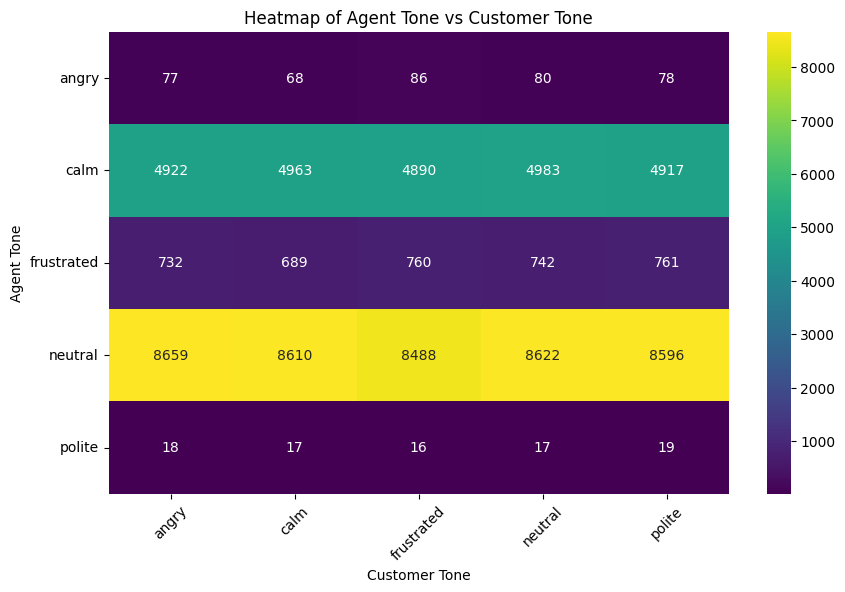

In [126]:
contingency_table = pd.crosstab(main_dataset['agent_tone'], main_dataset['customer_tone'])
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap of Agent Tone vs Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Agent Tone')
plt.xticks(rotation=45) 
plt.yticks(rotation=0)   
plt.show()

In [128]:
agent_tone=main_dataset.groupby('agent_tone').size()
customer_tone= main_dataset.groupby('customer_tone').size()
print(agent_tone)
print("--------------------")
print(customer_tone)

agent_tone
angry           389
calm          24675
frustrated     3684
neutral       42975
polite           87
dtype: int64
--------------------
customer_tone
angry         14408
calm          14347
frustrated    14240
neutral       14444
polite        14371
dtype: int64
